# **Formula 1 Data Analysis (1999-2024)**

## Objectives

* The objective of this notebook is to analyse the Formula 1 data from (1999-2004)

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [3]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\Default.DESKTOP-QO1EVKV\\OneDrive\\Documents\\GitHubRepos\\Formula1\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [4]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [5]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\Default.DESKTOP-QO1EVKV\\OneDrive\\Documents\\GitHubRepos\\Formula1'

# Section 1: ETL Process

1.1  Extract: Import Libraries,Extracting and loading of data

In [6]:
# Import required libaries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* Load the following Datasets from the (Inputs) Folder

In [7]:
# Load the data
races = pd.read_csv('Inputs/races.csv')
results = pd.read_csv('Inputs/results.csv')
drivers = pd.read_csv('Inputs/drivers.csv')
constructors = pd.read_csv('Inputs/constructors.csv')
circuits = pd.read_csv('Inputs/circuits.csv')
lap_times = pd.read_csv('Inputs/lap_times.csv')
pit_stops = pd.read_csv('Inputs/pit_stops.csv')
qualifying = pd.read_csv('Inputs/qualifying.csv')  

# Reduce the data set for races from 1999-2024  
races = races[(races['year'] >= 1999) & (races['year'] <= 2024)] 

# Filter other datasets based on raceId in the filtered races dataset
filtered_race_ids = races['raceId']  # Get valid raceId values

results = results[results['raceId'].isin(filtered_race_ids)]
lap_times = lap_times[lap_times['raceId'].isin(filtered_race_ids)]
pit_stops = pit_stops[pit_stops['raceId'].isin(filtered_race_ids)]
qualifying = qualifying[qualifying['raceId'].isin(filtered_race_ids)]

# Filter drivers and constructors
filtered_driver_ids = results['driverId']
filtered_constructor_ids = results['constructorId']

drivers = drivers[drivers['driverId'].isin(filtered_driver_ids)]
constructors = constructors[constructors['constructorId'].isin(filtered_constructor_ids)]

# Extract the relevant circuitId values
filtered_circuit_ids = races['circuitId'].unique()  # Get unique circuitId values

# Filter circuits based on circuitId values present in races
circuits = circuits[circuits['circuitId'].isin(filtered_circuit_ids)]



* Because there is a URL column for the datasets races,drivers,constructors and circuits, these need to be changed to make them unique And more identifiable,they will be changed to this format : url_races

In [8]:
# Rename the 'url' column in races,drivers,constructor and circuits
races.rename(columns={'url': 'url_races'}, inplace=True) 
drivers.rename(columns={'url': 'url_drivers'}, inplace=True) 
constructors.rename(columns={'url': 'url_constructors'}, inplace=True) 
circuits.rename(columns={'url': 'url_circuits'}, inplace=True) 

print(races.columns) 
print(drivers.columns) 
print(constructors.columns) 
print(circuits.columns) 


Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time',
       'url_races', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date',
       'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'],
      dtype='object')
Index(['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob',
       'nationality', 'url_drivers'],
      dtype='object')
Index(['constructorId', 'constructorRef', 'name', 'nationality',
       'url_constructors'],
      dtype='object')
Index(['circuitId', 'circuitRef', 'name', 'location', 'country', 'lat', 'lng',
       'alt', 'url_circuits'],
      dtype='object')


* Check the shape of the data sets to confirm the data has loaded properly

In [9]:
# Check the shape of the each data sets 

print('\nDataset Shapes:') 
print('races:', races.shape) 
print('results:', results.shape) 
print('drivers:', drivers.shape) 
print('constructors:', constructors.shape) 
print('circuits:', circuits.shape) 
print('lap_times:', lap_times.shape) 
print('pit_stops:', pit_stops.shape) 
print('qualifying:', qualifying.shape)  




Dataset Shapes:
races: (495, 18)
results: (10431, 18)
drivers: (130, 9)
constructors: (39, 5)
circuits: (38, 9)
lap_times: (541269, 6)
pit_stops: (11371, 7)
qualifying: (9163, 9)


---

* Check for missing values in the datasets

In [10]:
#Check for missing values in the datasets  
print('Missing Values:') 
print('races:', races.isnull().sum())
print('results:', results.isnull().sum())  
print('drivers:', drivers.isnull().sum()) 
print('constructors:', constructors.isnull().sum()) 
print('circuits:', circuits.isnull().sum())  
print('lap_times:', lap_times.isnull().sum()) 
print('pit_stops:', pit_stops.isnull().sum())  
print('qualifying:', qualifying.isnull().sum())  


Missing Values:
races: raceId         0
year           0
round          0
circuitId      0
name           0
date           0
time           0
url_races      0
fp1_date       0
fp1_time       0
fp2_date       0
fp2_time       0
fp3_date       0
fp3_time       0
quali_date     0
quali_time     0
sprint_date    0
sprint_time    0
dtype: int64
results: resultId           0
raceId             0
driverId           0
constructorId      0
number             0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time               0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
dtype: int64
drivers: driverId       0
driverRef      0
number         0
code           0
forename       0
surname        0
dob            0
nationality    0
url_drivers    0
dtype: int64
constructors: constructorId       0
constructorRef      0
name                0
nat

* All the data is clean apart from q2 and q3 which I would expect considering it is qualifying for the race and will leave them in

---

* Data now needs merging ready for the EDA process to help analyse the hypothesis

* Merge results with drivers

In [11]:
# Merge results with drivers
results_drivers = results.merge(drivers, on='driverId', how='left')
print(results_drivers.head())



   resultId  raceId  driverId  constructorId number_x  grid position  \
0         1      18         1              1       22     1        1   
1         2      18         2              2        3     5        2   
2         3      18         3              3        7     7        3   
3         4      18         4              4        5    11        4   
4         5      18         5              1       23     3        5   

  positionText  positionOrder  points  ...  fastestLapSpeed statusId  \
0            1              1    10.0  ...          218.300        1   
1            2              2     8.0  ...          217.586        1   
2            3              3     6.0  ...          216.719        1   
3            4              4     5.0  ...          215.464        1   
4            5              5     4.0  ...          218.385        1   

    driverRef number_y code  forename     surname         dob nationality  \
0    hamilton       44  HAM     Lewis    Hamilton  1985-0

* Add constructor Information by merging results_drivers dataframe with constructors dataset

In [12]:
# Merge with constructors
results_drivers_constructors = results_drivers.merge(constructors, on='constructorId', how='left')
print(results_drivers_constructors.head())


   resultId  raceId  driverId  constructorId number_x  grid position  \
0         1      18         1              1       22     1        1   
1         2      18         2              2        3     5        2   
2         3      18         3              3        7     7        3   
3         4      18         4              4        5    11        4   
4         5      18         5              1       23     3        5   

  positionText  positionOrder  points  ...  code  forename     surname  \
0            1              1    10.0  ...   HAM     Lewis    Hamilton   
1            2              2     8.0  ...   HEI      Nick    Heidfeld   
2            3              3     6.0  ...   ROS      Nico     Rosberg   
3            4              4     5.0  ...   ALO  Fernando      Alonso   
4            5              5     4.0  ...   KOV    Heikki  Kovalainen   

          dob nationality_x                                     url_drivers  \
0  1985-01-07       British     http://en.w

* Now races to be added to results_drivers_constructors dateframe

In [13]:
# Merge with races dataset
results_drivers_constructors_races = results_drivers_constructors.merge(races, on='raceId' , how='left')
print(results_drivers_constructors_races.head())

   resultId  raceId  driverId  constructorId number_x  grid position  \
0         1      18         1              1       22     1        1   
1         2      18         2              2        3     5        2   
2         3      18         3              3        7     7        3   
3         4      18         4              4        5    11        4   
4         5      18         5              1       23     3        5   

  positionText  positionOrder  points  ...  fp1_date fp1_time fp2_date  \
0            1              1    10.0  ...        \N       \N       \N   
1            2              2     8.0  ...        \N       \N       \N   
2            3              3     6.0  ...        \N       \N       \N   
3            4              4     5.0  ...        \N       \N       \N   
4            5              5     4.0  ...        \N       \N       \N   

  fp2_time fp3_date fp3_time quali_date  quali_time sprint_date sprint_time  
0       \N       \N       \N         \N     

* Merge with Circuits dataset to results_drivers_constructors_races dataframe 

In [14]:
merged_data = results_drivers_constructors_races.merge(circuits, on='circuitId', how='left')
print(merged_data.head())

   resultId  raceId  driverId  constructorId number_x  grid position  \
0         1      18         1              1       22     1        1   
1         2      18         2              2        3     5        2   
2         3      18         3              3        7     7        3   
3         4      18         4              4        5    11        4   
4         5      18         5              1       23     3        5   

  positionText  positionOrder  points  ...  sprint_date sprint_time  \
0            1              1    10.0  ...           \N          \N   
1            2              2     8.0  ...           \N          \N   
2            3              3     6.0  ...           \N          \N   
3            4              4     5.0  ...           \N          \N   
4            5              5     4.0  ...           \N          \N   

    circuitRef                            name   location    country      lat  \
0  albert_park  Albert Park Grand Prix Circuit  Melbourne  

In [15]:
print(merged_data.columns) 

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number_x', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time_x',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'driverRef', 'number_y', 'code',
       'forename', 'surname', 'dob', 'nationality_x', 'url_drivers',
       'constructorRef', 'name_x', 'nationality_y', 'url_constructors', 'year',
       'round', 'circuitId', 'name_y', 'date', 'time_y', 'url_races',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time', 'circuitRef',
       'name', 'location', 'country', 'lat', 'lng', 'alt', 'url_circuits'],
      dtype='object')


* Save Merged Dataset to a CSV file in Outputs

In [16]:
# Create CSV file for the merged data
merged_data.to_csv('Outputs/F1_merged_data.csv', index=False)

# Section 2 EDA Visuals 

Section 2 content

* Import necessary libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

In [19]:
# Load the data
file_path = "Outputs/F1_merged_data.csv"  #file path 
df = pd.read_csv(file_path)

# Display basic structure
print("Dataset Shape:", df.shape)
print("First few rows:\n", df.head())

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Convert relevant date fields (if applicable)
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])

# Display basic statistics
print("\nBasic Statistics:\n", df.describe())

# Display column names to check structure
print("\nColumns in Dataset:\n", df.columns)

Dataset Shape: (10431, 55)
First few rows:
    resultId  raceId  driverId  constructorId  number_x  grid position  \
0         1      18         1              1        22     1        1   
1         2      18         2              2         3     5        2   
2         3      18         3              3         7     7        3   
3         4      18         4              4         5    11        4   
4         5      18         5              1        23     3        5   

  positionText  positionOrder  points  ...  sprint_date sprint_time  \
0            1              1    10.0  ...           \N          \N   
1            2              2     8.0  ...           \N          \N   
2            3              3     6.0  ...           \N          \N   
3            4              4     5.0  ...           \N          \N   
4            5              5     4.0  ...           \N          \N   

    circuitRef                            name   location    country      lat  \
0  albert

* Number of Races Per Year (Bar Plot)

C:\Users\Default.DESKTOP-QO1EVKV\AppData\Local\Temp\ipykernel_3384\2995908815.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=races_per_year.index, y=races_per_year.values, palette="viridis")


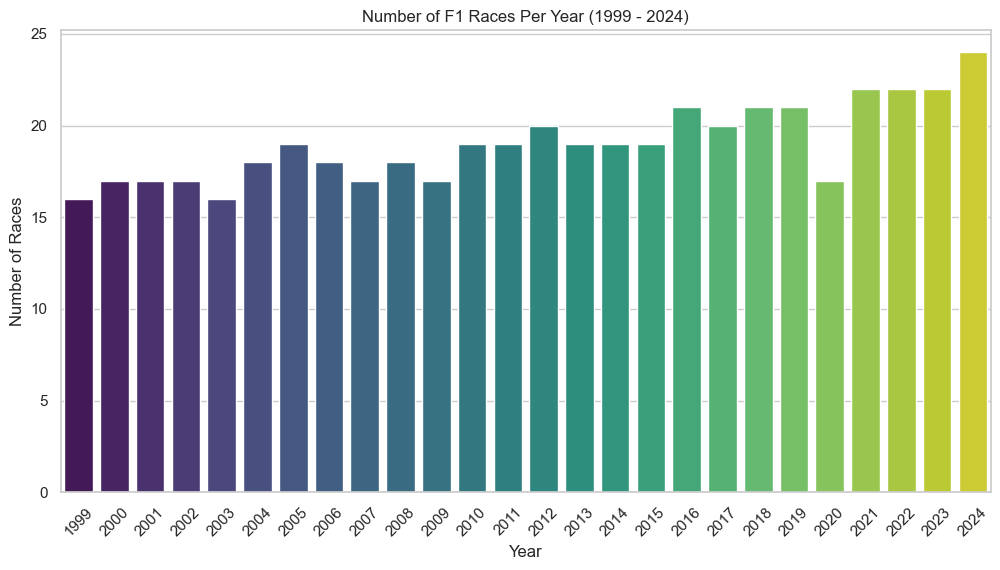

In [20]:
# Count races per year
races_per_year = df.groupby('year')['raceId'].nunique()

# Plot the number of races per year
plt.figure(figsize=(12, 6))
sns.barplot(x=races_per_year.index, y=races_per_year.values, palette="viridis")
plt.xlabel("Year")
plt.ylabel("Number of Races")
plt.title("Number of F1 Races Per Year (1999 - 2024)")
plt.xticks(rotation=45)
plt.show()


* Top 10 Most Successful Drivers (Bar Chart)

C:\Users\Default.DESKTOP-QO1EVKV\AppData\Local\Temp\ipykernel_3384\184740374.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_drivers.values, y=top_drivers.index, palette="mako")


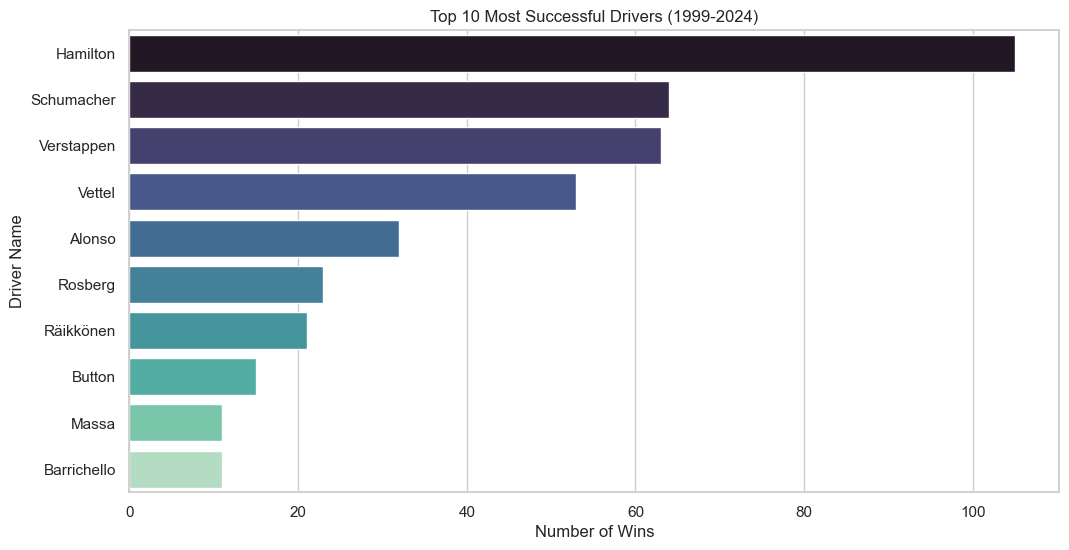

In [26]:
# Count number of wins per driver
top_drivers = df[df['positionOrder'] == 1]['surname'].value_counts().head(10)

# Plot Top 10 Drivers by Wins
plt.figure(figsize=(12, 6))
sns.barplot(x=top_drivers.values, y=top_drivers.index, palette="mako")
plt.xlabel("Number of Wins")
plt.ylabel("Driver Name")
plt.title("Top 10 Most Successful Drivers (1999-2024)")
plt.show()


---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.